In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Context

Specklegrams are created by a process called modal interference, which happens at the end of a multimode optical fiber. The dimensions of a multimode fiber (MMF) allow several light modes at different wavelengths to propagate, meaning that electromagnetic waves travel along several specific paths.

When a laser beam goes into an optical fiber, it creates different ways the light can travel. This depends on the size of the fiber. There's a relationship between the diameter of the core and the cladding, and the number of ways the light can travel. Speckle or specklegrams are created from these optical paths and the phase delays of each mode. This pattern is a changing spatial distribution of intensities, where constructive interference creates areas of maximum intensity, while total destructive interference between modes produces areas of no light.

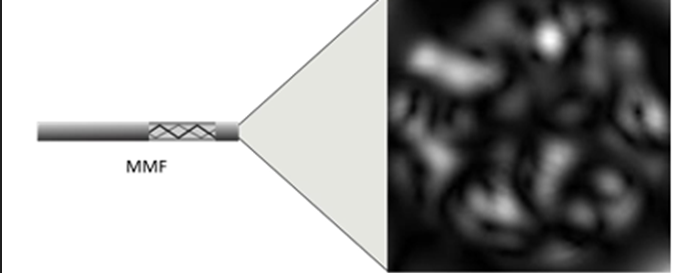

The specklegram has great metrological utility, as the patterns generated can give information about the disturbances made along the fiber. The prediction of the magnitude of these disturbances will depend on the mathematical tools used.

Synthetic specklegram simulations were performed using the Finite Element Method (FEM) within COMSOL Multiphysics, integrated with Matlab. This model simulated the propagation of an optical field through a multimode optical fiber, concentrating specifically on the sensing region affected by temperature fluctuations. This method facilitated an accurate approximation of the behavior of the fiber under perturbations, excluding undisturbed regions to optimize computational efficiency [1].

Through this FEM model, the vector wave equation 1 was numerically solved for each propagation mode within the multimode optical fiber (MMF) under analysis [1, 2].

$$
\nabla\times\nabla\times\vec{E}-k_0^2n^2\vec{E}=0 \enspace
$$

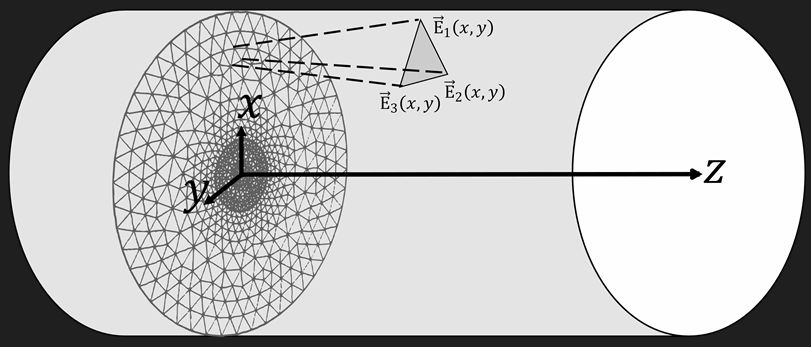

Here $\vec{E}$, represents the electric field of each mode, $k_0$ is the wavenumber in vacuum, and n stands for the refractive index of the MMF. The refractive index can further be updated in response to thermal fluctuations using Equation 2.

$$
n\approx n_0+C_{T0}(T-T_0)\enspace
$$

Where $C_{TO}$ is the thermo-optic coefficient, $n_0$ the reference index, $T_0$  the reference temperature, and T the temperature to be measured.The initial core refractive index is calculated using the Sellmeier equation [1], while the cladding refractive index $n_{0cla}$ is given by equation 3.

$$
n_{0cla} = \sqrt{n^2_{0co} - NA^2} \enspace
$$

Where $n_0co$ is the initial core refractive index and NA is the numerical aperture.

This are the optical parametters of the dataset we show as an example:

<table style="width:20%">
<tr>
<th>Numerical aperture (nm)</th>
<th>0.13 </th>
</tr>

<tr>
<td>Wavelength (nm)</td>
<td>632.8 </td>
</tr>

<tr>
<td>Core Diameter (µm) </td>
<td>9</td>
</tr>

<tr>
<td>Cladding Diameter (µm)       </td>
<td>40</td>
</tr>

<tr>
<td>Core Index  </td>
<td>1.457 </td>
</tr>

<tr>
<td>Cladding Index   </td>
<td>1.4521 </td>
</tr>

<tr>
<td>length of the Perturbation (mm)</td>
<td>0.3 </td>
</tr

<tr>
<td>Temperature Range (°C) </td>
<td>0 to 100</td>
</tr>

<tr>
<td>Step (°C)</td>
<td>0.1</td>
</tr>

<tr>
<td>Number of images </td>
<td>1001 </td>
</tr>
</table>


## Data loading and initial visualization

As a result of the simulation previously explained, we get a dataset of images with variations of intensities in every pixel that represent the speckle as a result of the modal interference pattern. In this work we will do some oprations to 5 specklegrams images at diferents temperatures. Images are loaded and shown below:

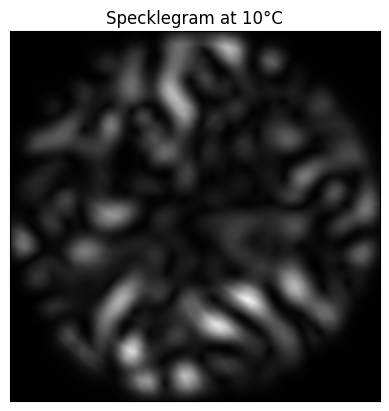

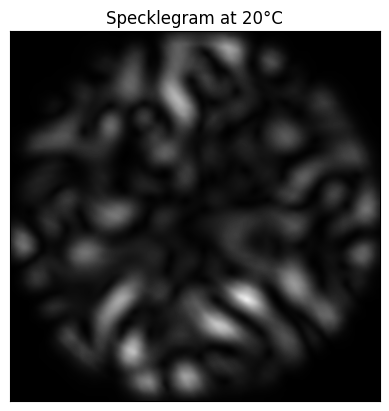

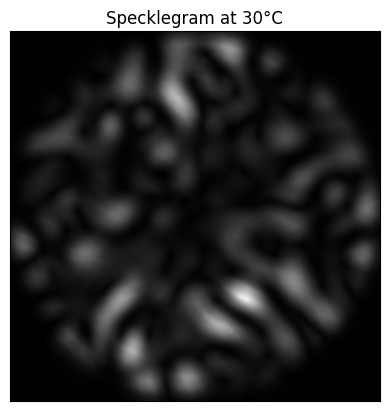

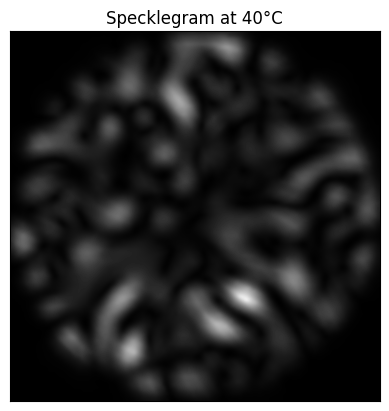

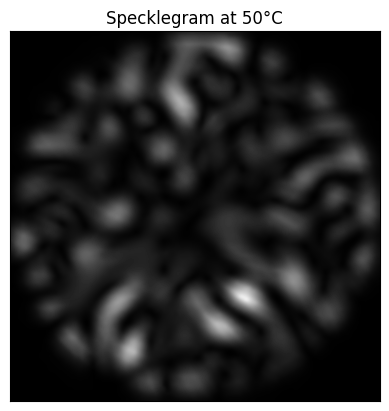

In [36]:
for i in range (5):
    #Mostrar imagen
    plt.xticks([]), plt.yticks([])
    plt.title('Specklegram at ' + str(i+1) + '0°C')
    plt.imshow(cv2.imread('DII_' + str(i+1) + '0.tiff', cv2.IMREAD_GRAYSCALE), cmap='gray', interpolation='bicubic')
    plt.show()

Diferences between images can't be noticed with the naked eye, so machine learning methods are used to identify key features and classify the images.

## OOP for data processing

We need to preprocess the images, first we normalize the image to a size of (13,13) using the .normalize() method. Then we add contrast and brightness with the method .brightAndCont(), for this images the contrast and the brightness shouldn't be more than 150% and 50 respectively, so we won't lose important characteristics of the image.

Classes are created below, including functions to plot the images, preprocess the images and to operate images.

In [60]:
def Plot(Text, image):
        plt.xticks([]), plt.yticks([])
        plt.title(Text)
        plt.imshow(image, cmap='gray')
        plt.show()

class ImgProcessing:
    def __init__(self, selection):
        self.selection = selection  
        try:
            self.image = cv2.imread('DII_' + str(self.selection) + '0.tiff', cv2.IMREAD_GRAYSCALE)
        except FileNotFoundError:
            print(f"Error: Image not found")
            self.image = None  

    def normalize(self):
        self.image = self.image/255

    def resize(self, Size):
        self.image = cv2.resize(self.image, (Size, Size), cv2.INTER_CUBIC)
#Procesar Imgs
    def brightAndCont(self, C, B):
        self.image = (self.image * (C//100)) + B
    
    def brightAndContAuto(self, C, B):
        self.image = cv2.convertScaleAbs(self.image, alpha = C/100, beta = B)

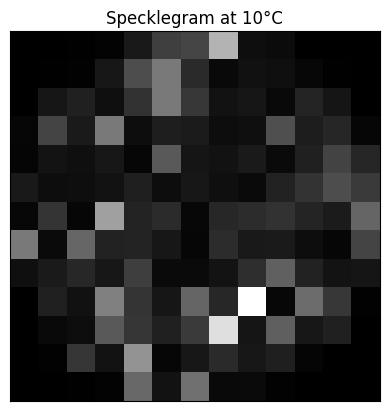

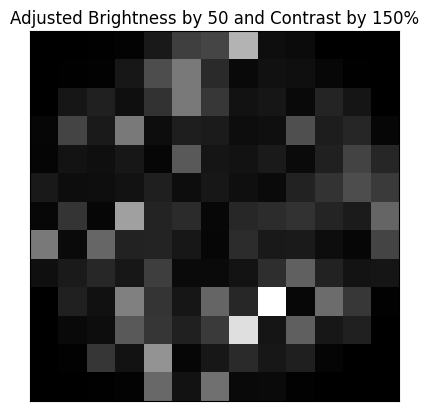

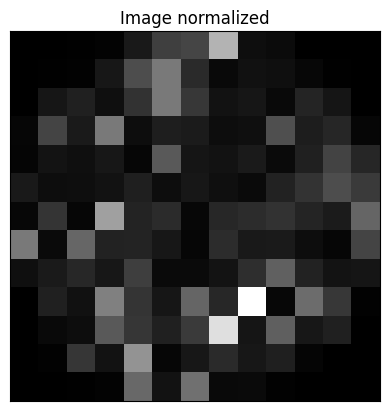

In [65]:
selection = int(input('Which image do you want to transform? (Select 1 to 5)'))
Image_example = ImgProcessing(selection)
Image_example.resize(13)
Plot('Specklegram at ' + str(selection) + '0°C', Image_example.image)

Brightness = int(input('Select the brightness adjustment (Select 0 to 50)'))
Contrast = int(input('Select the contrast adjustment (Select a %, up to 150%)'))
if Contrast > 150:
    Contrast = 150
if Brightness > 50:
    Brightness = 50    

Image_example.brightAndCont(Contrast, Brightness)
#Image_example
#.brightAndContAuto(Contrast, Brightness)

Plot(f'Adjusted Brightness by {Brightness} and Contrast by {Contrast}%', Image_example.image)
Image_example.normalize()
Plot('Image normalized', Image_example.image)


## Numerical derivation or integration of data

Here we will use finite difference method (forward difference), which calculate the discrete derivative of a function

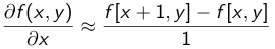

(https://www.cs.toronto.edu/~fidler/slides/2022Winter/CSC420/lecture3.pdf)




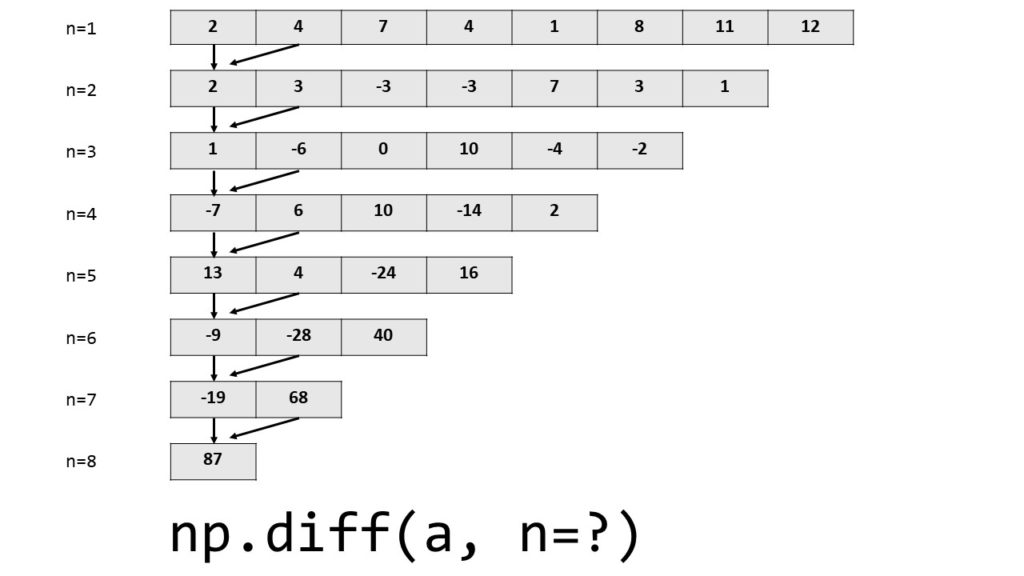

(https://blog.finxter.com/numpy-np-diff-simply-explained-bonus-video/)

Then we need to use the method .padd() from the numpy library, since the .diff() method reduces the dimensionality of the array, so to avoid dimensional errors it must be filled with 0.

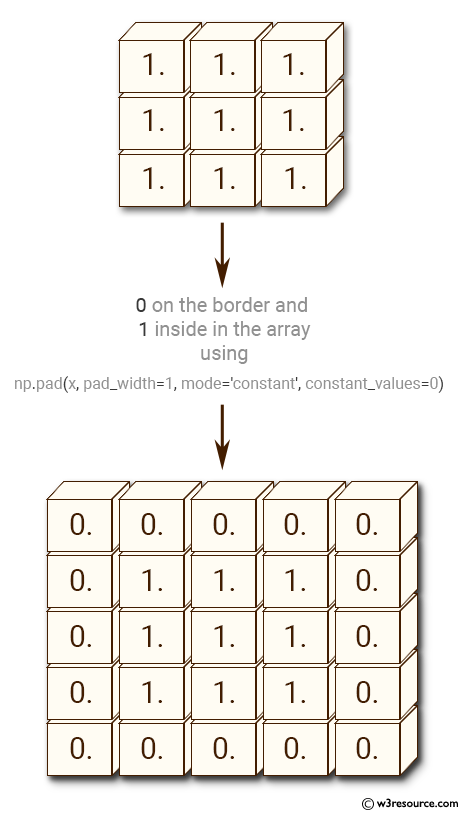

(https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-9.php)

In [83]:
class Operations(ImgProcessing):
    def __init__(self, selection):
        super().__init__(selection)

    def FDM(self):
        grad_x = np.diff(self.image, axis=1)
        grad_y = np.diff(self.image, axis=0)
        
        grad_x = np.pad(grad_x, ((0, 0), (0, 1)), mode='constant')
        grad_y = np.pad(grad_y, ((0, 1), (0, 0)), mode='constant')
        self.image  = np.clip(np.sqrt(grad_x**2 + grad_y**2), 0, 255)

    def PCA(self):
        H, W = self.image.shape  
        mean = np.mean(self.image, axis=0)
        centered_data = self.image - mean 
        
        covariance_matrix = np.cov(centered_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]

        num_components = int(np.floor(np.sqrt(min(H, W))) ** 2)

        principal_components = eigenvectors[:, :num_components]

        transformed_data = np.dot(centered_data, principal_components)

        # side_length = int(np.sqrt(num_components))
        # print(side_length)
        # principal_components_square = principal_components[:, :side_length**2].reshape(side_length, side_length)
        
        return transformed_data, principal_components



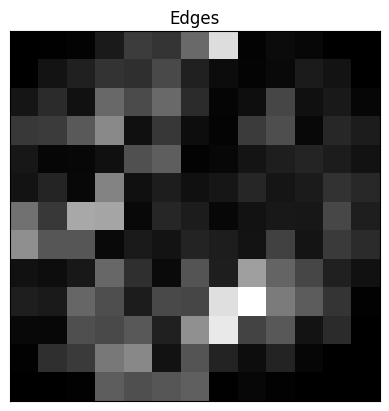

In [84]:
Image_Final = Operations(selection)
Image_Final.resize(13)
Image_Final.brightAndContAuto(135, 40)
Image_Final.normalize()

Image_Final.FDM()
Plot('Edges', Image_Final.image)

## Matrix operations

To apply matrix operations, principal component analysis (PCA) will be used to extratc the main characteristics of the image and reduce its dimensionality. PCA is commonly used in computer vision and pattern recognition algorithms, as an example, the following image shows something called "eigenfaces" wich every eigenface is the eigenvectors resulting from the covariance matrix.

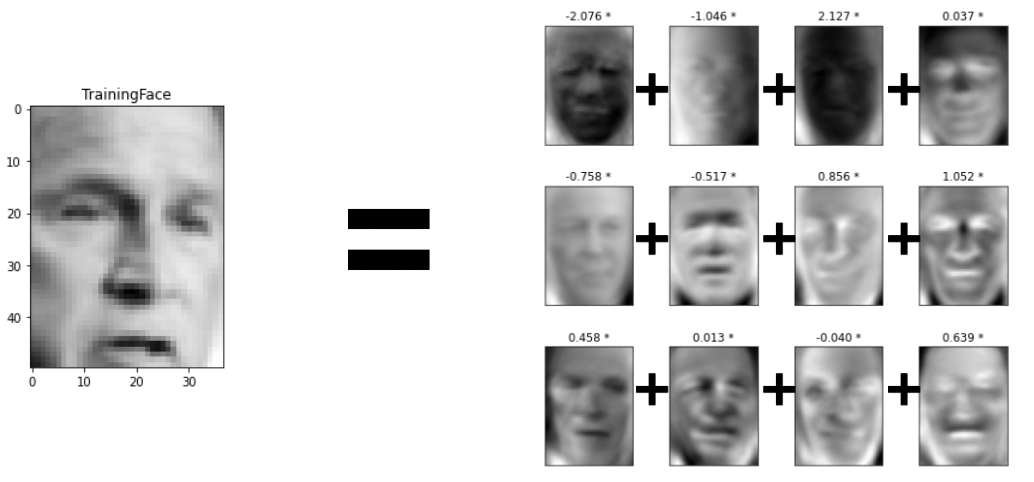

(https://www.geeksforgeeks.org/ml-face-recognition-using-eigenfaces-pca-algorithm/)

An example of a covariance matrix is shown below:

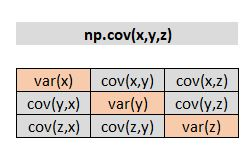

(https://colab.research.google.com/drive/1eJhvhDHHr40LCyf-Ixu5JyO9SKLn4369)


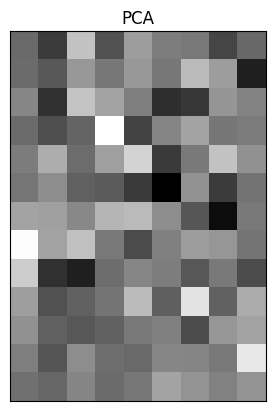

In [85]:
transformed_data, principal_components = Image_Final.PCA()
Plot('PCA', principal_components)

An image cannot really be appreciated here because we have made so many transformations and operations to the image that it is practically unrecognizable, from the principal components it is possible to reconstruct the original image by performing a dot product between the transformed data and the principal components.

In this case the PCA matrix is treated as an image wich we use as the input of the neural network. We can do this instead of resizing the image.

## References

 [1] Juan David Arango Moreno, Yeraldin Velez, Victor Aristizabal, Francisco Velez, Gómez Alberto, Jairo Quijano, and Jorge
 Herrera Ramirez. Numerical study using finite element method for the thermal response of fiber specklegram sensors with
 changes in the length of the sensing zone. Computer Optics, 45:534–540, 07 2021.
 
 [2] Luis Castaño, Luis Gutierrez, Jairo Quijano, Jorge Herrera-Ramírez, Alejandro Hoyos, Francisco Vélez, Víctor Aristizabal,
 Luiz Silva-Nunez, and Jorge Gómez. Temperature measurement by means of fiber specklegram sensors (fss). Óptica Pura y
 Aplicada, 2018.